## Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [35]:
# load all csv's
dataFrame_Phone   = pd.read_csv('..\..\datasets\Human_Activity\FinalFullDataAct.csv')
dataFrame_Watch   = pd.read_csv('..\..\datasets\Human_Activity\FinalFullDataWatchAct.csv')
dataFrame_Glasses = pd.read_csv('..\..\datasets\Human_Activity\data_glasses_resampled.csv')


## Prepare each of the 3 datasets

In [36]:
dataFrame_Phone.head(2)

,Unnamed: 0,level_0,index,timestamp,pressure,index_activity,activity,step_detector,audio_mic_1,audio_mic_2,...,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,number_of_devices_wifi,battery,bluetooth,diffTimeSec
0,0,0,1,2017-06-29 09:57:30,963.21035,0.0,Eat,1,11927.200000,7563.650340,...,-0.150097,-0.568192,0.018634,-34.885090,-10.494576,7.99074,46.0,81.0,2.0,30.0
1,1,1,2,2017-06-29 09:58:00,963.37771,0.0,Eat,1,9694.366667,7582.004297,...,0.216265,-0.180258,-0.001961,-27.762173,-9.277909,-3.41551,56.0,80.8,2.0,30.0


In [37]:
dataFrame_Watch.head(2)

,Unnamed: 0,index,timestamp,pressure,index_activity,activity,orientation_X,orientation_Y,orientation_Z,accelerometer_X,accelerometer_Y,accelerometer_Z,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,battery,heart_rate
0,0,0,2017-06-29 09:57:00,963.911814,0.0,Eat,79.680770,18.019663,53.085002,-6.929031,-2.798776,0.388177,0.239771,-0.002628,-0.223755,28.776245,4.395142,-26.474915,82.0,74.500
1,1,1,2017-06-29 09:57:30,964.412230,0.0,Eat,122.794534,7.547025,87.135285,-8.889236,-2.654816,1.480637,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.0,76.875


In [38]:
dataFrame_Glasses.head(2)

,Unnamed: 0,timestamp,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,index_activity,activity
0,0,2017-06-29 19:59:00,-1933.695355,6067.150273,-14517.316940,324.083333,131.252732,1770.051913,-146.051913,7.036885,-153.088798,69.418033,8.0,Walk
1,1,2017-06-29 19:59:30,-1856.925333,2856.066000,-15053.673333,153.396000,21.510000,100.305333,-191.543333,-65.152667,-126.390667,128.282667,8.0,Walk


In [39]:
# Tables length
print(f"Phone: {len(dataFrame_Phone)}")
print(f"Watch: {len(dataFrame_Watch)}")
print(f"Glasses: {len(dataFrame_Glasses)}\n")

# Print all activities labels for each device:
print(f"Phone:\n{sorted(dataFrame_Phone['activity'].unique())}")
print(f"Watch:\n{sorted(dataFrame_Watch['activity'].unique())}")  # has [Football, Running, Watching TV] which are not labels in Phone dataset
print(f"Glasses:\n{sorted(dataFrame_Glasses['activity'].unique())}")  # missing: ['Movie', 'Pause', 'Sleep'] that are in phone

Phone: 4890
Watch: 3971
Glasses: 1038

Phone:
['Cooking', 'Eat', 'In computer', 'Meeting', 'Movie', 'Pause', 'Picnic ', 'Sleep', 'Video games', 'Walk']
Watch:
['Cooking', 'Eat', 'Football', 'In computer', 'Meeting', 'Movie', 'Pause', 'Picnic ', 'Running', 'Sleep', 'Video games', 'Walk', 'Watching TV']
Glasses:
['Cooking', 'Eat', 'In computer', 'Meeting', 'Picnic ', 'Video games', 'Walk']


#### we can see that not all devices have the same number of labels due to the fact that some devices have more period of time than others. 

In [40]:
print(f"for Phone:\n{dataFrame_Phone['activity'].value_counts()}\n")

for Phone:
In computer    1247
Walk           1005
Picnic          619
Pause           413
Eat             390
Video games     278
Meeting         273
Cooking         242
Movie           214
Sleep           209
Name: activity, dtype: int64



In [41]:
print(f"for Watch:\n{dataFrame_Watch['activity'].value_counts()}\n")

for Watch:
In computer    953
Walk           937
Sleep          410
Picnic         370
Eat            287
Meeting        224
Video games    199
Cooking        151
Pause          127
Football       116
Movie          102
Watching TV     90
Running          5
Name: activity, dtype: int64



In [42]:
print(f"for Glasses:\n{dataFrame_Glasses['activity'].value_counts()}\n")

for Glasses:
Walk           316
Video games    290
In computer    195
Eat            119
Meeting         50
Picnic          35
Cooking         33
Name: activity, dtype: int64



In [43]:
# Print all columns for each device
print(f"Phone:\n{dataFrame_Phone.columns}\n")
print(f"Watch:\n{dataFrame_Watch.columns}\n")
print(f"Glasses:\n{dataFrame_Glasses.columns}")

Phone:
Index(['Unnamed: 0', 'level_0', 'index', 'timestamp', 'pressure',
       'index_activity', 'activity', 'step_detector', 'audio_mic_1',
       'audio_mic_2', 'audio_mic_3', 'audio_mic_4', 'gravity',
       'linear_acceleration', 'orientation_X', 'orientation_Y',
       'orientation_Z', 'accelerometer_X', 'accelerometer_Y',
       'accelerometer_Z', 'gyroscope_X', 'gyroscope_Y', 'gyroscope_Z',
       'magnetometer_X', 'magnetometer_Y', 'magnetometer_Z',
       'number_of_devices_wifi', 'battery', 'bluetooth', 'diffTimeSec'],
      dtype='object')

Watch:
Index(['Unnamed: 0', 'index', 'timestamp', 'pressure', 'index_activity',
       'activity', 'orientation_X', 'orientation_Y', 'orientation_Z',
       'accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 'gyroscope_X',
       'gyroscope_Y', 'gyroscope_Z', 'magnetometer_X', 'magnetometer_Y',
       'magnetometer_Z', 'battery', 'heart_rate'],
      dtype='object')

Glasses:
Index(['Unnamed: 0', 'timestamp', 'ACC_X', 'ACC_Y', 'ACC

#### each device has a different number of features, some of the features are the same, some are different.

In [44]:
# remove not used columns
dataFrame_Phone   = dataFrame_Phone.drop(columns=['Unnamed: 0','level_0', 'index','index_activity','diffTimeSec'], axis=1)
dataFrame_Watch   = dataFrame_Watch.drop(columns=['Unnamed: 0','index','index_activity'], axis=1)
dataFrame_Glasses = dataFrame_Glasses.drop(columns=['Unnamed: 0', 'index_activity'], axis=1)

In [30]:
dataFrame_Phone.head(2)

,timestamp,pressure,activity,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,linear_acceleration,...,accelerometer_Z,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,number_of_devices_wifi,battery,bluetooth
0,2017-06-29 09:57:30,963.21035,Eat,1,11927.200000,7563.650340,32767.0,45.0,9.42856,2.38437,...,1.176354,-0.150097,-0.568192,0.018634,-34.885090,-10.494576,7.99074,46.0,81.0,2.0
1,2017-06-29 09:58:00,963.37771,Eat,1,9694.366667,7582.004297,32767.0,45.0,9.49572,1.97839,...,-1.521636,0.216265,-0.180258,-0.001961,-27.762173,-9.277909,-3.41551,56.0,80.8,2.0


In [45]:
dataFrame_Watch.head(2)

,timestamp,pressure,activity,orientation_X,orientation_Y,orientation_Z,accelerometer_X,accelerometer_Y,accelerometer_Z,gyroscope_X,gyroscope_Y,gyroscope_Z,magnetometer_X,magnetometer_Y,magnetometer_Z,battery,heart_rate
0,2017-06-29 09:57:00,963.911814,Eat,79.680770,18.019663,53.085002,-6.929031,-2.798776,0.388177,0.239771,-0.002628,-0.223755,28.776245,4.395142,-26.474915,82.0,74.500
1,2017-06-29 09:57:30,964.412230,Eat,122.794534,7.547025,87.135285,-8.889236,-2.654816,1.480637,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.0,76.875


In [46]:
dataFrame_Glasses.head(2)

,timestamp,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V,activity
0,2017-06-29 19:59:00,-1933.695355,6067.150273,-14517.316940,324.083333,131.252732,1770.051913,-146.051913,7.036885,-153.088798,69.418033,Walk
1,2017-06-29 19:59:30,-1856.925333,2856.066000,-15053.673333,153.396000,21.510000,100.305333,-191.543333,-65.152667,-126.390667,128.282667,Walk


## Merge

In [47]:
from functools import reduce
df = [dataFrame_Watch,dataFrame_Phone, dataFrame_Glasses]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp','activity'], how='outer'), df)
df_merged.sort_values(by = 'timestamp',inplace=True)
df_merged.reset_index(inplace=True)


In [16]:
df_merged.to_csv("../../datasets/Human_Activity/combine_Phone_Watch_and_Glasses.csv")

In [48]:
df_merged.head()

,index,timestamp,pressure_x,activity,orientation_X_x,orientation_Y_x,orientation_Z_x,accelerometer_X_x,accelerometer_Y_x,accelerometer_Z_x,...,ACC_X,ACC_Y,ACC_Z,GYRO_X,GYRO_Y,GYRO_Z,EOG_L,EOG_R,EOG_H,EOG_V
0,0,2017-06-29 09:57:00,963.911814,Eat,79.680770,18.019663,53.085002,-6.929031,-2.798776,0.388177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017-06-29 09:57:30,964.412230,Eat,122.794534,7.547025,87.135285,-8.889236,-2.654816,1.480637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-06-29 09:58:00,965.146670,Eat,144.739604,3.635352,88.689077,-11.005234,-4.207565,2.818146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3971,2017-06-29 09:58:30,NaN,Eat,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2017-06-29 09:59:00,963.865050,Eat,77.601256,-5.988203,94.542864,-9.931454,-4.263046,1.531603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

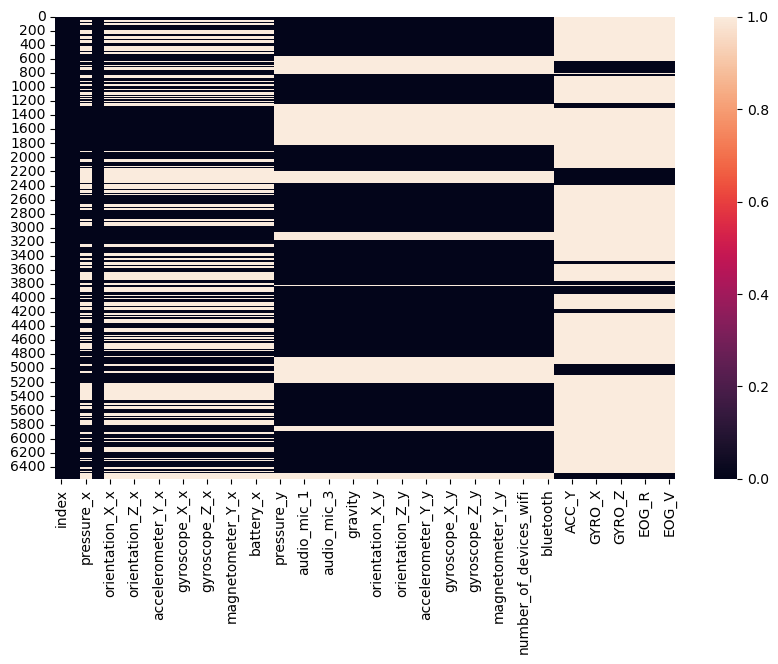

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged).astype(int))

#### due to the fact that glasses data contain a lot of missing values, we will drop them and merge only smartwatch and phone data

In [50]:
## cheack for null values
print('Phone percentage of nan:',df_merged['pressure_x'].isna().sum() / len(df_merged))
print('Watch percentage of nan:',df_merged['pressure_y'].isna().sum() / len(df_merged))
print('Glasses percentage of nan:',df_merged['ACC_Y'].isna().sum() / len(df_merged))


Phone percentage of nan: 0.3957699330493001
Watch percentage of nan: 0.2559342665855143
Glasses percentage of nan: 0.8420572124163116


In [51]:
from functools import reduce
df = [dataFrame_Phone, dataFrame_Watch]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp','activity'], how='outer'), df)
df_merged.sort_values(by = 'timestamp',inplace=True)
df_merged.reset_index(inplace=True)


In [52]:
df_merged.head()

,index,timestamp,pressure_x,activity,step_detector,audio_mic_1,audio_mic_2,audio_mic_3,audio_mic_4,gravity,...,accelerometer_Y_y,accelerometer_Z_y,gyroscope_X_y,gyroscope_Y_y,gyroscope_Z_y,magnetometer_X_y,magnetometer_Y_y,magnetometer_Z_y,battery_y,heart_rate
0,4890,2017-06-29 09:57:00,NaN,Eat,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.798776,0.388177,0.239771,-0.002628,-0.223755,28.776245,4.395142,-26.474915,82.0,74.500000
1,0,2017-06-29 09:57:30,963.210350,Eat,1.0,11927.200000,7563.650340,32767.0,45.0,9.428560,...,-2.654816,1.480637,-1.027466,0.728256,0.866241,42.903137,-9.513855,-25.811768,82.0,76.875000
2,1,2017-06-29 09:58:00,963.377710,Eat,1.0,9694.366667,7582.004297,32767.0,45.0,9.495720,...,-4.207565,2.818146,-1.385284,1.318619,1.436371,28.717041,-23.501587,-18.550110,81.5,83.500000
3,2,2017-06-29 09:58:30,963.352867,Eat,1.0,7590.000000,7579.942257,32767.0,45.0,9.548030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,2017-06-29 09:59:00,963.356162,Eat,1.0,11810.733333,7589.977663,32767.0,45.0,9.502039,...,-4.263046,1.531603,-0.003113,-0.310699,-1.348114,39.378357,-0.975037,-10.728455,81.0,78.411429


<Axes: >

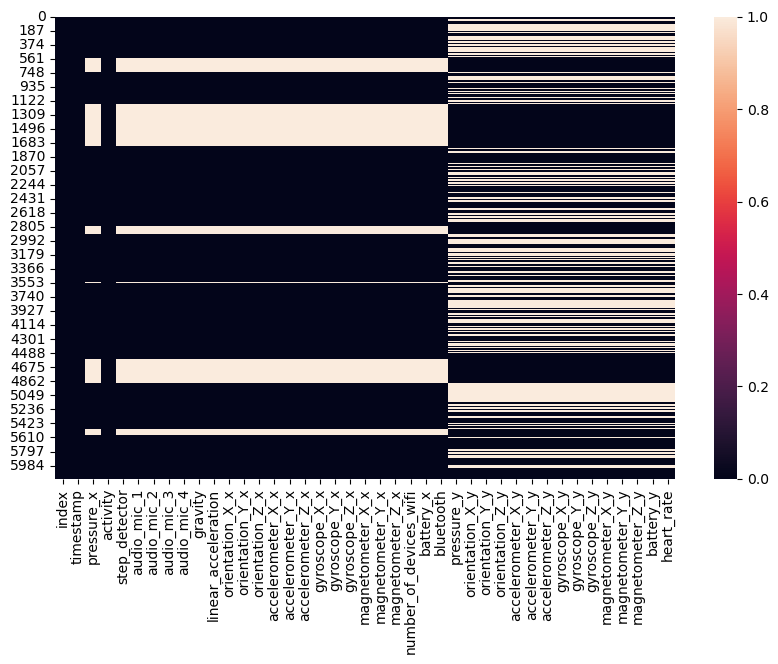

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged).astype(int))

In [54]:
def merage_features(df,feature_name):
    index_x=df[f"{feature_name}_x"].isna()
    index_y=df[f"{feature_name}_y"].isna()

    feature_1 = f'{feature_name}_x'
    feature_2 = f'{feature_name}_y'
    feature_name_new = f'{feature_name}_combine'
    
    # New feature name for the combine tables
    df[feature_name_new] = None
    
    # Fill valuse - for cells that only 1 of both is not nan
    df.loc[~index_x, feature_name_new] = df[feature_1][~index_x]
    df.loc[~index_x, feature_name_new] = df[feature_1][~index_x]
    df.loc[~index_y, feature_name_new] = df[feature_2][~index_y]
    
    # Find index with both clomunn that are not None - set to the mean of them.
    idx = ~index_x & ~index_y
    df.loc[idx, feature_name_new] = (df[feature_1][idx] + df[feature_2][idx])/2
    
    return df
    
           


In [55]:
# Columns to combine between the tables

## Dont combine these features, they are not related
# all_col = ['orientation_X', 'orientation_Y', 'orientation_Z',
#            'accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 
#            'gyroscope_X', 'gyroscope_Y', 'gyroscope_Z',
#            'magnetometer_X', 'magnetometer_Y', 'magnetometer_Z']

# Combine the following features from the phone and watch tables - that have correlation between them (see in vizualization)
all_col = ['pressure']
len(all_col)

1

In [56]:
for col in all_col:
    df_merged = merage_features(df_merged,col)

In [57]:
# Drop all columns with  '_x' and '_y'
df_merged_drop = df_merged.copy(deep=True)
for col in all_col:
    df_merged_drop.drop(columns=[f'{col}_x', f'{col}_y'], axis=1, inplace=True)

In [58]:
# Rename the columns to phone and table
all_col = ['orientation_X', 'orientation_Y', 'orientation_Z',
           'accelerometer_X', 'accelerometer_Y', 'accelerometer_Z', 
           'gyroscope_X', 'gyroscope_Y', 'gyroscope_Z',
           'magnetometer_X', 'magnetometer_Y', 'magnetometer_Z'
           "battery"]

for col in all_col:
    df_merged_drop.rename(columns = {f'{col}_x':f'{col}_phone',f'{col}_y':f'{col}_watch'}, inplace = True)

In [59]:
df_merged_drop.columns

Index(['index', 'timestamp', 'activity', 'step_detector', 'audio_mic_1',
       'audio_mic_2', 'audio_mic_3', 'audio_mic_4', 'gravity',
       'linear_acceleration', 'orientation_X_phone', 'orientation_Y_phone',
       'orientation_Z_phone', 'accelerometer_X_phone', 'accelerometer_Y_phone',
       'accelerometer_Z_phone', 'gyroscope_X_phone', 'gyroscope_Y_phone',
       'gyroscope_Z_phone', 'magnetometer_X_phone', 'magnetometer_Y_phone',
       'magnetometer_Z_x', 'number_of_devices_wifi', 'battery_x', 'bluetooth',
       'orientation_X_watch', 'orientation_Y_watch', 'orientation_Z_watch',
       'accelerometer_X_watch', 'accelerometer_Y_watch',
       'accelerometer_Z_watch', 'gyroscope_X_watch', 'gyroscope_Y_watch',
       'gyroscope_Z_watch', 'magnetometer_X_watch', 'magnetometer_Y_watch',
       'magnetometer_Z_y', 'battery_y', 'heart_rate', 'pressure_combine'],
      dtype='object')

<Axes: >

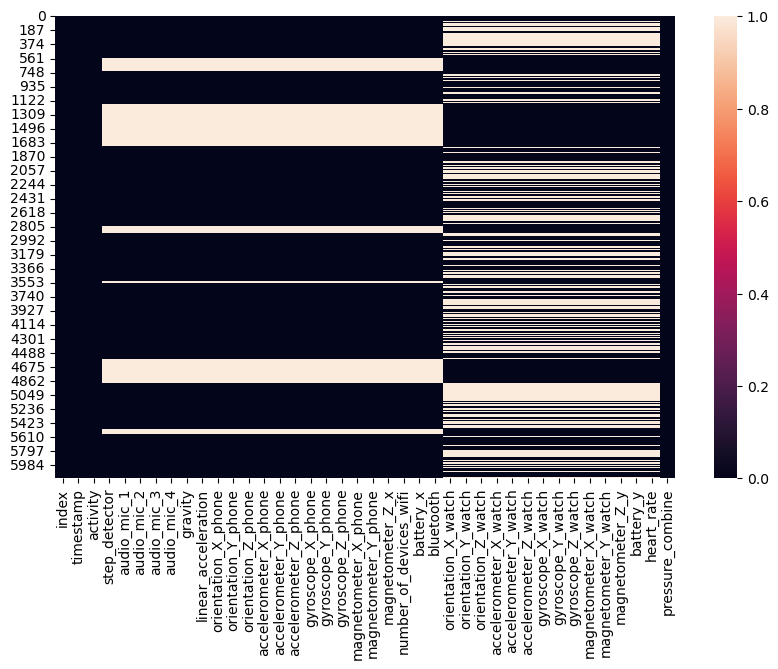

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged_drop).astype(int))

### Fill nan values

In [61]:
df_merged_drop.columns

Index(['index', 'timestamp', 'activity', 'step_detector', 'audio_mic_1',
       'audio_mic_2', 'audio_mic_3', 'audio_mic_4', 'gravity',
       'linear_acceleration', 'orientation_X_phone', 'orientation_Y_phone',
       'orientation_Z_phone', 'accelerometer_X_phone', 'accelerometer_Y_phone',
       'accelerometer_Z_phone', 'gyroscope_X_phone', 'gyroscope_Y_phone',
       'gyroscope_Z_phone', 'magnetometer_X_phone', 'magnetometer_Y_phone',
       'magnetometer_Z_x', 'number_of_devices_wifi', 'battery_x', 'bluetooth',
       'orientation_X_watch', 'orientation_Y_watch', 'orientation_Z_watch',
       'accelerometer_X_watch', 'accelerometer_Y_watch',
       'accelerometer_Z_watch', 'gyroscope_X_watch', 'gyroscope_Y_watch',
       'gyroscope_Z_watch', 'magnetometer_X_watch', 'magnetometer_Y_watch',
       'magnetometer_Z_y', 'battery_y', 'heart_rate', 'pressure_combine'],
      dtype='object')

In [62]:
# We applyed a linear intepolation for the battery and light data points
feature_list = ['audio_mic_1', 'audio_mic_2', 'audio_mic_3', 'audio_mic_4', 
                'gravity', 'linear_acceleration', 
                'orientation_X_phone', 'orientation_Y_phone', 'orientation_Z_phone',
                'accelerometer_X_phone', 'accelerometer_Y_phone', 'accelerometer_Z_phone',
                'gyroscope_X_phone', 'gyroscope_Y_phone', 'gyroscope_Z_phone',
                'magnetometer_X_phone', 'magnetometer_Y_phone', 'magnetometer_Z_x',               
                'battery_x',
                'battery_y',
                'orientation_X_watch', 'orientation_Y_watch', 'orientation_Z_watch',
                'accelerometer_X_watch', 'accelerometer_Y_watch', 'accelerometer_Z_watch',
                'gyroscope_X_watch', 'gyroscope_Y_watch', 'gyroscope_Z_watch',
                'magnetometer_X_watch', 'magnetometer_Y_watch', 'magnetometer_Z_y',
                'heart_rate',
                'pressure_combine']

for feature in feature_list:
    df_merged_drop[feature] = df_merged_drop[feature].interpolate()

In [63]:
# Fill the nan value with 0 for 'step_detector'
df_merged_drop['step_detector'].fillna(0, inplace = True)

In [64]:
df_merged_drop['timestamp'] = pd.to_datetime(df_merged_drop['timestamp'])


<Axes: >

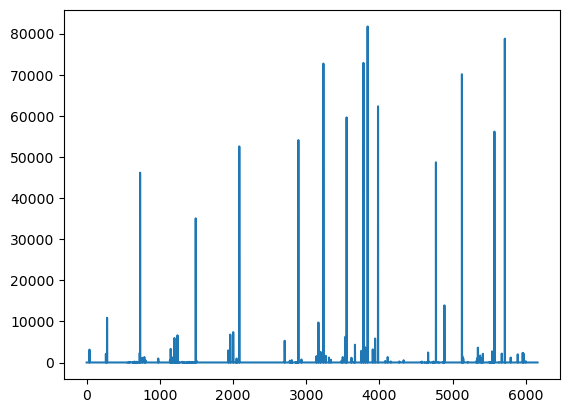

In [65]:
# Fill Wifi and BT with the int(mean)
diffTime = df_merged_drop['timestamp'].diff()
diffTimeSec = diffTime.dt.total_seconds()
df_merged_drop['diffTimeSec'] = diffTimeSec

diffTimeSec.plot()

In [66]:
# add the diff between the rows timestamp for checking what is the gap between two consecutive rows
# This function fill the nan values of the bluetooth
# for each row we check if the value is nan and if the gap between this row to the previus row is smaller than two sample rate (60 s) 
# if so we fill the nan by the previus value 
# elif the value is nan and the gap is bigger than 2 sample rate, we fill the nan by the int mean value of the bluetooth
def fillFunc(x, BluMean):
    bluetooth   = x.bluetooth
    diffTimeSec = x.diffTimeSec
    name        = x.name    
    if np.isnan(bluetooth) and diffTimeSec < 61:
        x.bluetooth = df_merged_drop.loc[name-1,'bluetooth']
    elif np.isnan(bluetooth):
        x.bluetooth = BluMean
    return x

def fillFunc_wifi(x, wifiMean):
    number_of_devices_wifi   = x.number_of_devices_wifi
    diffTimeSec = x.diffTimeSec
    name        = x.name    
    if np.isnan(number_of_devices_wifi) and diffTimeSec < 61:
        x.number_of_devices_wifi = df_merged_drop.loc[name-1,'number_of_devices_wifi']
    elif np.isnan(number_of_devices_wifi):
        x.number_of_devices_wifi = wifiMean
    return x

In [67]:
BluMean = int(df_merged_drop['bluetooth'].mean())
for index,row in df_merged_drop.iterrows():
    df_merged_drop.iloc[index] = fillFunc(row, BluMean)

In [68]:
wifiMean = int(df_merged_drop['number_of_devices_wifi'].mean())
for index,row in df_merged_drop.iterrows():
    df_merged_drop.iloc[index] = fillFunc_wifi(row, wifiMean)

<Axes: >

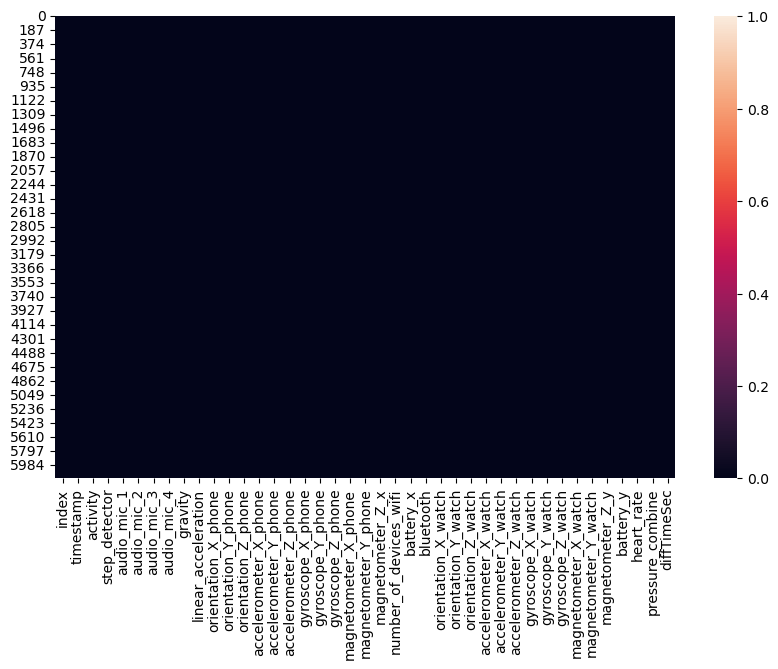

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.isnull(df_merged_drop).astype(int))

In [70]:
# drop the remain nan values - they were all in the first row
df_merged_drop = df_merged_drop.drop(0)
print(df_merged_drop.isna().sum().sum())

0


In [131]:
df_merged_drop.to_csv("../../datasets/Human_Activity/combine_Phone_and_Watch_interpolated.csv")